In [0]:
!pip install landsatxplore
!pip install gdal
!pip install rasterio

In [0]:
!mkdir data
!mkdir data/scene1
!mkdir data/scene2
!mkdir data/scene3



---



**IMPORT LIBRARIES**

In [0]:
import rasterio
from rasterio.plot import show
import gdal
from gdalconst import GA_ReadOnly 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import subprocess
IMG_SIZE=1000
BIG_IMG_SIZE=2000
import cv2
import multiprocessing
from sklearn.metrics import classification_report

In [0]:
COORDINATE_SYSTEM='EPSG:32632'

**HELPER FUNCTIONS**

In [0]:
def clip_ref_scene(input_file,output_file):
  data=gdal.Open(input_file,GA_ReadOnly) 
  geoTransform=data.GetGeoTransform() 
  minx=geoTransform[0] 
  maxy=geoTransform[3] 
  maxx = minx + geoTransform[1] * data.RasterXSize 
  miny = maxy + geoTransform[5] * data.RasterYSize 
  subprocess.call('gdal_translate -projwin ' + ' '.join([str(x) for x in [minx, maxy, maxx, miny]]) + ' -of GTiff europe.tif ' +output_file, shell=True) 

def resize_scene(input_file,output_file):
  subprocess.call('gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize '+str(IMG_SIZE)+' '+str(IMG_SIZE)+' -r bilinear '+input_file+' '+output_file,shell=True)

def change_coordinate_system(inputfile,outputfile):
  subprocess.run(['gdalwarp','-co','COMPRESS=DEFLATE','-t_srs',COORDINATE_SYSTEM,inputfile,outputfile])


def resize_scene_custom_size(input_file,output_file,xsize,ysize):
  subprocess.call('gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize '+str(xsize)+' '+str(ysize)+' '+input_file+' '+output_file,shell=True)



---



**DOWNLOAD REFERENCE DATA SET**

In [0]:
!wget https://land.copernicus.eu/land-files/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
!unzip /content/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
!unzip /content/clc2018_clc2018_v2018_20_raster100m.zip

**TRANSFORM REFERENCE DATA**

In [0]:
change_coordinate_system('/content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif','europe.tif')



---



**DOWNLOAD TEMPORAL SCENES OF MANNHEIM REGION**

In [8]:
from landsatxplore.earthexplorer import EarthExplorer
ee = EarthExplorer('uname', 'uname')
train11id='LC08_L1TP_195026_20190825_20190903_01_T1'
train12id='LC08_L1TP_195026_20180822_20180829_01_T1'
train13id='LC08_L1TP_195026_20190419_20190423_01_T1'
ee.download(scene_id=train11id, output_dir='./data/scene1')
ee.logout()
ee = EarthExplorer('uname', 'uname')
ee.download(scene_id=train12id, output_dir='./data/scene2')
ee.logout()
ee = EarthExplorer('uname', 'uname')
ee.download(scene_id=train13id, output_dir='./data/scene3')
ee.logout()

930MB [06:42, 2.43MB/s]                           
927MB [00:55, 17.6MB/s]                           
910MB [01:55, 8.27MB/s]                           




---



**PREPROCESS SCENES**

In [0]:
!tar xvzf '/content/data/scene1/LC08_L1TP_195026_20190825_20190903_01_T1.tar.gz' -C './data/scene1'
!tar xvzf '/content/data/scene2/LC08_L1TP_195026_20180822_20180829_01_T1.tar.gz' -C './data/scene2'
!tar xvzf '/content/data/scene3/LC08_L1TP_195026_20190419_20190423_01_T1.tar.gz' -C './data/scene3'

SCENE 1 PREPROCESSING

In [0]:
change_coordinate_system('/content/data/scene1/'+train11id+'_B2.TIF', 's1b2-temp.tif')
resize_scene('s1b2-temp.tif', 's1b2.tif')

change_coordinate_system('/content/data/scene1/'+train11id+'_B3.TIF', 's1b3-temp.tif')
resize_scene('s1b3-temp.tif','s1b3.tif')

change_coordinate_system('/content/data/scene1/'+train11id+'_B4.TIF' ,'s1b4-temp.tif')
resize_scene('s1b4-temp.tif','s1b4.tif')

change_coordinate_system('/content/data/scene1/'+train11id+'_B5.TIF' ,'s1b5-temp.tif')
resize_scene('s1b5-temp.tif','s1b5.tif')

change_coordinate_system('/content/data/scene1/'+train11id+'_B6.TIF' ,'s1b6-temp.tif')
resize_scene('s1b6-temp.tif','s1b6.tif')

change_coordinate_system('/content/data/scene1/'+train11id+'_B7.TIF', 's1b7-temp.tif')
resize_scene('s1b7-temp.tif','s1b7.tif')

SCENE 2 PREPROCESSING

In [0]:
change_coordinate_system('/content/data/scene2/'+train12id+'_B2.TIF', 's2b2-temp.tif')
resize_scene('s2b2-temp.tif','s2b2.tif')

change_coordinate_system('/content/data/scene2/'+train12id+'_B3.TIF', 's2b3-temp.tif')
resize_scene('s2b3-temp.tif','s2b3.tif')

change_coordinate_system('/content/data/scene2/'+train12id+'_B4.TIF', 's2b4-temp.tif')
resize_scene('s2b4-temp.tif','s2b4.tif')

change_coordinate_system('/content/data/scene2/'+train12id+'_B5.TIF', 's2b5-temp.tif')
resize_scene('s2b5-temp.tif','s2b5.tif')

change_coordinate_system('/content/data/scene2/'+train12id+'_B6.TIF' ,'s2b6-temp.tif')
resize_scene('s2b6-temp.tif','s2b6.tif')

change_coordinate_system('/content/data/scene2/'+train12id+'_B7.TIF', 's2b7-temp.tif')
resize_scene('s2b7-temp.tif','s2b7.tif')

SCENE 3 PREPROCESSING

In [0]:
change_coordinate_system('/content/data/scene3/'+train13id+'_B2.TIF', 's3b2-temp.tif')
resize_scene('s3b2-temp.tif','s3b2.tif')

change_coordinate_system('/content/data/scene3/'+train13id+'_B3.TIF', 's3b3-temp.tif')
resize_scene('s3b3-temp.tif','s3b3.tif')

change_coordinate_system('/content/data/scene3/'+train13id+'_B4.TIF' ,'s3b4-temp.tif')
resize_scene('s3b4-temp.tif','s3b4.tif')

change_coordinate_system('/content/data/scene3/'+train13id+'_B5.TIF', 's3b5-temp.tif')
resize_scene('s3b5-temp.tif','s3b5.tif')

change_coordinate_system('/content/data/scene3/'+train13id+'_B6.TIF', 's3b6-temp.tif')
resize_scene('s3b6-temp.tif','s3b6.tif')

change_coordinate_system('/content/data/scene3/'+train13id+'_B7.TIF', 's3b7-temp.tif')
resize_scene('s3b7-temp.tif','s3b7.tif')


**TEST DATA - LONDON REGION, UK (UNSEEN DATA)**

In [0]:
!mkdir test-data
!mkdir test-data/scene1
!mkdir test-data/scene2
!mkdir test-data/scene3

In [14]:
from landsatxplore.earthexplorer import EarthExplorer
ee = EarthExplorer('uname', 'uname')
test1id='LC08_L1TP_201024_20180901_20180912_01_T1'
test2id='LC08_L1TP_201024_20180629_20180716_01_T1'
test3id='LC08_L1TP_201024_20170610_20170627_01_T1'
ee.download(scene_id=test1id, output_dir='./test-data/scene1')
ee.logout()
ee = EarthExplorer('uname', 'uname')
ee.download(scene_id=test2id, output_dir='./test-data/scene2')
ee.logout()
ee = EarthExplorer('uname', 'uname')
ee.download(scene_id=test3id, output_dir='./test-data/scene3')
ee.logout()

878MB [17:22, 883kB/s]                           
902MB [00:52, 18.1MB/s]                           
911MB [01:22, 11.5MB/s]                           


In [0]:
!tar xvzf '/content/test-data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1.tar.gz' -C './test-data/scene1'
!tar xvzf '/content/test-data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1.tar.gz' -C './test-data/scene2'
!tar xvzf '/content/test-data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1.tar.gz' -C './test-data/scene3'

SCENE 1 PREPROCESSING

In [0]:
change_coordinate_system('/content/test-data/scene1/'+test1id+'_B2.TIF' ,'test-s1b2-temp.tif')
resize_scene('test-s1b2-temp.tif','test-s1b2.tif')

change_coordinate_system('/content/test-data/scene1/'+test1id+'_B3.TIF', 'test-s1b3-temp.tif')
resize_scene('test-s1b3-temp.tif','test-s1b3.tif')

change_coordinate_system('/content/test-data/scene1/'+test1id+'_B4.TIF', 'test-s1b4-temp.tif')
resize_scene('test-s1b4-temp.tif','test-s1b4.tif')

change_coordinate_system('/content/test-data/scene1/'+test1id+'_B5.TIF' ,'test-s1b5-temp.tif')
resize_scene('test-s1b5-temp.tif','test-s1b5.tif')

change_coordinate_system('/content/test-data/scene1/'+test1id+'_B6.TIF', 'test-s1b6-temp.tif')
resize_scene('test-s1b6-temp.tif','test-s1b6.tif')

change_coordinate_system('/content/test-data/scene1/'+test1id+'_B7.TIF', 'test-s1b7-temp.tif')
resize_scene('test-s1b7-temp.tif','test-s1b7.tif')

In [0]:
resize_scene_custom_size('test-s1b2-temp.tif','test-big-s1b2.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s1b3-temp.tif','test-big-s1b3.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s1b4-temp.tif','test-big-s1b4.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s1b5-temp.tif','test-big-s1b5.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s1b6-temp.tif','test-big-s1b6.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s1b7-temp.tif','test-big-s1b7.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)

SCENE 2 PREPROCESSING

In [0]:
change_coordinate_system('/content/test-data/scene2/'+test2id+'_B2.TIF' ,'test-s2b2-temp.tif')
resize_scene('test-s2b2-temp.tif','test-s2b2.tif')

change_coordinate_system('/content/test-data/scene2/'+test2id+'_B3.TIF', 'test-s2b3-temp.tif')
resize_scene('test-s2b3-temp.tif','test-s2b3.tif')

change_coordinate_system('/content/test-data/scene2/'+test2id+'_B4.TIF', 'test-s2b4-temp.tif')
resize_scene('test-s2b4-temp.tif','test-s2b4.tif')

change_coordinate_system('/content/test-data/scene2/'+test2id+'_B5.TIF' ,'test-s2b5-temp.tif')
resize_scene('test-s2b5-temp.tif','test-s2b5.tif')

change_coordinate_system('/content/test-data/scene2/'+test2id+'_B6.TIF', 'test-s2b6-temp.tif')
resize_scene('test-s2b6-temp.tif','test-s2b6.tif')

change_coordinate_system('/content/test-data/scene2/'+test2id+'_B7.TIF', 'test-s2b7-temp.tif')
resize_scene('test-s2b7-temp.tif','test-s2b7.tif')

In [0]:
resize_scene_custom_size('test-s2b2-temp.tif','test-big-s2b2.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s2b3-temp.tif','test-big-s2b3.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s2b4-temp.tif','test-big-s2b4.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s2b5-temp.tif','test-big-s2b5.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s2b6-temp.tif','test-big-s2b6.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s2b7-temp.tif','test-big-s2b7.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)

SCENE 3 PREPROCESSING

In [0]:
change_coordinate_system('/content/test-data/scene3/'+test3id+'_B2.TIF', 'test-s3b2-temp.tif')
resize_scene('test-s3b2-temp.tif','test-s3b2.tif')

change_coordinate_system('/content/test-data/scene3/'+test3id+'_B3.TIF' ,'test-s3b3-temp.tif')
resize_scene('test-s3b3-temp.tif','test-s3b3.tif')

change_coordinate_system('/content/test-data/scene3/'+test3id+'_B4.TIF', 'test-s3b4-temp.tif')
resize_scene('test-s3b4-temp.tif','test-s3b4.tif')

change_coordinate_system('/content/test-data/scene3/'+test3id+'_B5.TIF' ,'test-s3b5-temp.tif')
resize_scene('test-s3b5-temp.tif','test-s3b5.tif')

change_coordinate_system('/content/test-data/scene3/'+test3id+'_B6.TIF', 'test-s3b6-temp.tif')
resize_scene('test-s3b6-temp.tif','test-s3b6.tif')

change_coordinate_system('/content/test-data/scene3/'+test3id+'_B7.TIF', 'test-s3b7-temp.tif')
resize_scene('test-s3b7-temp.tif','test-s3b7.tif')

In [0]:
resize_scene_custom_size('test-s3b2-temp.tif','test-big-s3b2.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s3b3-temp.tif','test-big-s3b3.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s3b4-temp.tif','test-big-s3b4.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s3b5-temp.tif','test-big-s3b5.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s3b6-temp.tif','test-big-s3b6.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)
resize_scene_custom_size('test-s3b7-temp.tif','test-big-s3b7.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)

REFERENCE DATA PREPROCESSING

In [0]:
clip_ref_scene('s1b2-temp.tif','img_out.tif')
resize_scene('/content/img_out.tif','Y.tif')



---



**HELPER** **FUNCTIONS**

In [0]:
#CALCULATE SPECTRAL INDICES LIKE NDVI, NDBI etc..
def calculate_spectral_index(band1,band2):
  ndbi=np.where((band1+band2)==0.,0,(band1-band2)/(band1+band2))
  return ndbi

def read_band_data(fileName):
        a=gdal.Open(fileName)
        a1=a.GetRasterBand(1).ReadAsArray().astype(dtype='float')
        return a1


In [0]:
#CALCULATE SPECTRAL INDICES FOR A SINGLE SCENE
def calculate_all_indices_for_a_scene(root_name):
        temp_list=[]
        b2=read_band_data((root_name+'b'+str(2)+'.tif'))
        b3=read_band_data((root_name+'b'+str(3)+'.tif'))
        b4=read_band_data((root_name+'b'+str(4)+'.tif'))
        b5=read_band_data((root_name+'b'+str(5)+'.tif'))
        b6=read_band_data((root_name+'b'+str(6)+'.tif'))
        b7=read_band_data((root_name+'b'+str(7)+'.tif'))

        temp_list.append(calculate_spectral_index(b6,b5))
        temp_list.append(calculate_spectral_index(b3,b5))
        temp_list.append(calculate_spectral_index(b5,b4))
        temp_list.append(calculate_spectral_index(b6,b7))
        temp_list.append(calculate_spectral_index(b4,b2))
        temp_list.append(calculate_spectral_index(b3,b2))

        return temp_list

In [0]:
scene1_indices=calculate_all_indices_for_a_scene('s1')
scene2_indices=calculate_all_indices_for_a_scene('s2')
scene3_indices=calculate_all_indices_for_a_scene('s3')

In [0]:
#CALCULATE TEMPORAL STATISTICS LIKE MEAN, MIN, MAX etc..
def calc_temporal_statistics(index,scene1,scene2,scene3,size,return_dict):
  print('Process started: '+str(index))
  temp_min = np.zeros(shape=(size,size))
  temp_max = np.zeros(shape=(size,size))
  temp_mean = np.zeros(shape=(size,size))
  temp_std = np.zeros(shape=(size,size))
  temp_mean_slope = np.zeros(shape=(size,size))


  for i,j in tqdm(np.ndindex(temp_min.shape)):    
      x=scene1[i][j]
      y=scene2[i][j]
      z=scene3[i][j]

      temp_min[i][j]=np.amin([x,y,z])
      temp_max[i][j]=np.amax([x,y,z])
      temp_mean[i][j]=np.mean([x,y,z])
      temp_std[i][j]=np.std([x,y,z])  
      temp_mean_slope[i][j]=np.average(np.diff([x,y,z]))

  return_dict[index]=(temp_min,temp_max,temp_mean,temp_std,temp_mean_slope)
  



---



**COMPUTE FEATURES BASED ON TEMPORAL CHARACTERSITCS OF DIFFERENT SCENES**

In [27]:
manager = multiprocessing.Manager()
return_dict = manager.dict()
jobs = []
for i in range(0,6):
    p = multiprocessing.Process(target=calc_temporal_statistics, args=(i,scene1_indices[i],scene2_indices[i],scene3_indices[i],IMG_SIZE,return_dict))
    jobs.append(p)
    p.start()

for proc in jobs:
    proc.join()
    proc.terminate()
    print(return_dict.keys())

Process started: 0
Process started: 1
Process started: 2
Process started: 3
Process started: 4
Process started: 5



[0]



[0, 3, 1]

[0, 3, 1, 2]
[0, 3, 1, 2]
[0, 3, 1, 2, 4]

[0, 3, 1, 2, 4, 5]


In [0]:
ndbi_statistics=return_dict.get(0)
mndwi_statistics=return_dict.get(1)
ndvi_statistics=return_dict.get(2)
ndmir_statistics=return_dict.get(3)
ndrb_statistics=return_dict.get(4)
ndgb_statistics=return_dict.get(5)

**EXAMPLE: VISUALIZING TEMPORAL MAX OF NDBI**

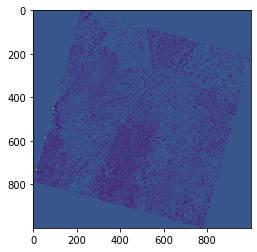

In [29]:
plt.imshow(ndbi_statistics[1]) 



---



**PREPARING TRAINING DATA - MANNHEIM REGION**

In [30]:
tif2=gdal.Open('Y.tif')
Y_raster = tif2.GetRasterBand(1).ReadAsArray()
Y_raster[Y_raster <= 100] = 999
Y_raster[(Y_raster > 100)&(Y_raster <= 150)] = 0
Y_raster[Y_raster > 150] = 255
print("UNIQUE CLASSES: ", np.unique(Y_raster))
Y_list=Y_raster.flatten().tolist()
y=np.reshape(Y_list,(IMG_SIZE*IMG_SIZE,1))
print(y.shape)

UNIQUE CLASSES:  [  0 255]
(1000000, 1)


In [31]:
records=[]
for i in tqdm(range(0,5)):
          records.append(ndbi_statistics[i].flatten().tolist())
          records.append(mndwi_statistics[i].flatten().tolist())
          records.append(ndvi_statistics[i].flatten().tolist())
          records.append(ndmir_statistics[i].flatten().tolist())
          records.append(ndrb_statistics[i].flatten().tolist())
          records.append(ndgb_statistics[i].flatten().tolist())


In [32]:
record=np.column_stack(records)
X=np.append(record, y, axis=1)
print('FULL TRAINING DATA SHAPE: ')
print(X.shape)


FULL TRAINING DATA SHAPE: 
(1000000, 31)


In [0]:
X_small=X[np.random.choice(np.shape(X)[0],5000, replace=False), :]
X_train=X_small[:,0:30]
Y_train=X_small[:,30]



---



**CLASSIFICATION :  SUPPORT VECTOR MACHINE - RBF KERNEL**

TRAINING

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameter_candidates = [
  {'C': [0.1,1, 10,30,50, 100,500, 1000], 'gamma': [0.001, 0.0001,10,20,50,100,500], 'kernel': ['rbf']}
]

classifier = GridSearchCV(SVC(), param_grid=parameter_candidates)
classifier.fit(X_train, Y_train)   


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 30, 50, 100, 500, 1000],
                          'gamma': [0.001, 0.0001, 10, 20, 50, 100, 500],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print('Best score:', classifier.best_score_) 
print('Best C value:',classifier.best_estimator_.C) 
print('Best Gamma value:',classifier.best_estimator_.gamma)

Best score: 0.9460000000000001
Best C value: 30
Best Gamma value: 10


In [36]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',C=classifier.best_estimator_.C,gamma=classifier.best_estimator_.gamma)
svclassifier.fit(X_train, Y_train)

SVC(C=30, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(svclassifier, f)

In [0]:
Y_pred = svclassifier.predict(X[:,0:30])

METRICS ON TRAINING DATA

In [39]:
from sklearn.metrics import classification_report
print(classification_report(X[:,30], Y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.35      0.48     72001
       255.0       0.95      0.99      0.97    927999

    accuracy                           0.94   1000000
   macro avg       0.85      0.67      0.72   1000000
weighted avg       0.94      0.94      0.94   1000000





---



**VISUALIZATION OF HUMAN SETTLEMENT**

ORIGINAL RGB IMAGE

In [0]:
s4=gdal.Open('s2b4.tif')
red = s4.GetRasterBand(1).ReadAsArray()
r=red.astype(dtype='int')

s3 = gdal.Open('s2b3.tif')
green = s3.GetRasterBand(1).ReadAsArray()
g=green.astype(dtype='int')

s2 = gdal.Open('s2b2.tif')
blue = s2.GetRasterBand(1).ReadAsArray()
b=blue.astype(dtype='int')

def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))
redn = normalize(r)
greenn = normalize(g)
bluen = normalize(b)
rgb = np.dstack((redn, greenn, bluen))
plt.imshow(rgb)

CLASSIFICATION RESULTS : BLACK=BUILT UP, WHITE=OTHERS

In [0]:
plt.gray()
plt.imshow(np.reshape(Y_pred,(IMG_SIZE,IMG_SIZE)))



---



**TESTING PHASE**

In [0]:
s4=gdal.Open('test-big-s1b4.tif')
red = s4.GetRasterBand(1).ReadAsArray()
r=red.astype(dtype='int')

s3 = gdal.Open('test-big-s1b3.tif')
green = s3.GetRasterBand(1).ReadAsArray()
g=green.astype(dtype='int')

s2 = gdal.Open('test-big-s1b2.tif')
blue = s2.GetRasterBand(1).ReadAsArray()
b=blue.astype(dtype='int')

def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))
redn = normalize(r)
greenn = normalize(g)
bluen = normalize(b)
rgb = np.dstack((redn, greenn, bluen))
plt.imshow(rgb)


In [43]:
test_scene1_indices=calculate_all_indices_for_a_scene('test-big-s1')
test_scene2_indices=calculate_all_indices_for_a_scene('test-big-s2')
test_scene3_indices=calculate_all_indices_for_a_scene('test-big-s3')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [0]:
manager = multiprocessing.Manager()
return_dict = manager.dict()
jobs = []
for i in range(0,6):
    p = multiprocessing.Process(target=calc_temporal_statistics, args=(i,test_scene1_indices[i],test_scene2_indices[i],test_scene3_indices[i],BIG_IMG_SIZE,return_dict))
    jobs.append(p)
    p.start()

for proc in jobs:
    proc.join()
    proc.terminate()
    print(return_dict.keys())

In [0]:
with open('london-statistics.pkl', 'wb') as f:
    pickle.dump(return_dict, f)

In [0]:
test_ndbi_statistics=return_dict.get(0)
test_mndwi_statistics=return_dict.get(1)
test_ndvi_statistics=return_dict.get(2)
test_ndmir_statistics=return_dict.get(3)
test_ndrb_statistics=return_dict.get(4)
test_ndgb_statistics=return_dict.get(5)

**VISUALIZING NDBI OF LONDON REGION, UK**

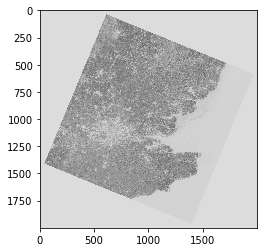

In [47]:
plt.imshow(test_ndbi_statistics[0]) 

In [48]:
test_records=[]
for i in tqdm(range(0,5)):
          test_records.append(test_ndbi_statistics[i].flatten().tolist())
          test_records.append(test_mndwi_statistics[i].flatten().tolist())
          test_records.append(test_ndvi_statistics[i].flatten().tolist())
          test_records.append(test_ndmir_statistics[i].flatten().tolist())
          test_records.append(test_ndrb_statistics[i].flatten().tolist())
          test_records.append(test_ndgb_statistics[i].flatten().tolist())

In [49]:
test_record=np.column_stack(test_records)
print('FULL TESTING DATA SHAPE: ')
print(test_record.shape)

FULL TESTING DATA SHAPE: 
(4000000, 30)


In [0]:
svclassifier = pickle.load(open('model.pkl', 'rb'))

In [0]:
preds = svclassifier.predict(test_record)

**FINAL PREDICTION ON UNSEEN DATA - LONDON REGION,UK**

In [0]:
plt.gray()
plt.imshow(np.reshape(preds,(BIG_IMG_SIZE,BIG_IMG_SIZE)))

In [53]:
cv2.imwrite("prediction.tif",np.reshape(preds,(BIG_IMG_SIZE,BIG_IMG_SIZE)))

True

In [0]:
clip_ref_scene('test-s1b2-temp.tif','img_out2.tif')
resize_scene('img_out2.tif','Y-test.tif')

In [0]:
resize_scene_custom_size('img_out2.tif','Y-big-test.tif',BIG_IMG_SIZE,BIG_IMG_SIZE)

In [56]:
tif3=gdal.Open('Y-big-test.tif')
Y_raster_test = tif3.GetRasterBand(1).ReadAsArray()
Y_raster_test[Y_raster_test <= 100] = 999
Y_raster_test[(Y_raster_test > 100)&(Y_raster_test <= 150)] = 0
Y_raster_test[Y_raster_test > 150] = 255
print("UNIQUE CLASSES: ", np.unique(Y_raster_test))
Y_test_list=Y_raster_test.flatten().tolist()
y_test=np.reshape(Y_test_list,(BIG_IMG_SIZE*BIG_IMG_SIZE,1))
print(y_test.shape)

UNIQUE CLASSES:  [  0 255]
(4000000, 1)


**TEST SET ACCURACY**

In [58]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.52      0.19      0.28    431802
         255       0.91      0.98      0.94   3568198

    accuracy                           0.89   4000000
   macro avg       0.72      0.58      0.61   4000000
weighted avg       0.87      0.89      0.87   4000000



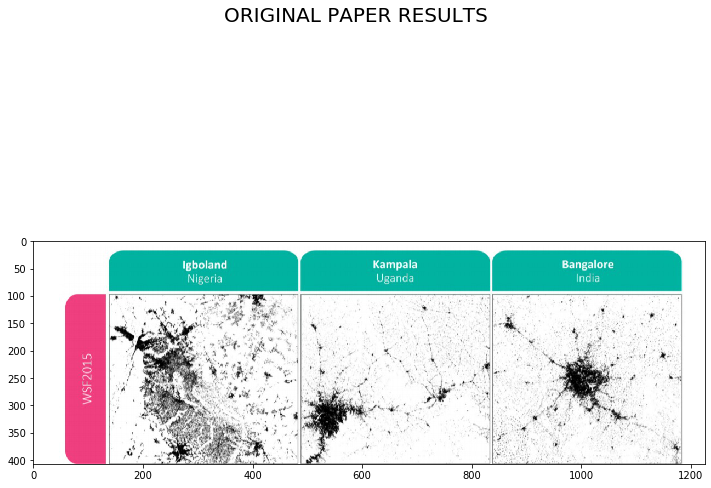

In [99]:
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

image_stack = io.MultiImage('/content/wsf-paper.jpg')
image = image_stack[0] 
fig = plt.figure(figsize= (10,10)) 
fig.suptitle('ORIGINAL PAPER RESULTS', fontsize=20)

io.imshow(image)
io.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


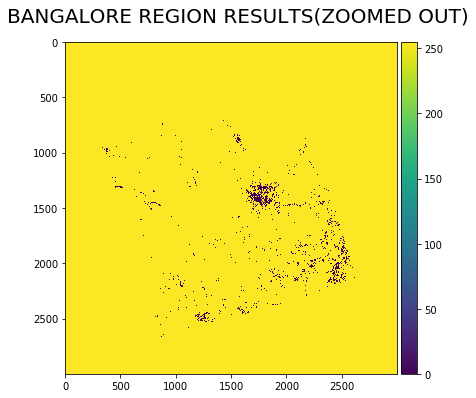

In [105]:
image_stack = io.MultiImage("/content/prediction-bangalore.tif")
image = image_stack[0] 
fig = plt.figure(figsize= (6,6)) 
fig.suptitle('BANGALORE REGION RESULTS (ZOOMED OUT)', fontsize=20)

io.imshow(image)
io.show()